In [1]:
import numpy as np
import json

In [2]:
import sys
import pathlib
sys.path.append(pathlib.Path().absolute().parent.as_posix())

In [3]:
from functions.dynamics_functions import psi_function 
from functions.trajectories import *
from functions.set_objects_from_data import *
from functions.plot_functions import *

from classes.EmpData import Data


## Set final year

In [4]:
T = 2050

# A: regular and occasional speakers

## A1: Full sample

### Version 1:  Start at 1998 with estimated numbers
* Constant model
* relative migration

In [5]:
# set parameters
# set parameters
with open("data/parameter_estimates.json", "r") as file: # 2014 and 1998 parameters are identical
    params = json.load(file) 

with open("data/data_1998.json", "r") as file:
    data = json.load(file)


parameters = get_params(params)
data_1998 = get_emp_data(data)

In [6]:
parameters.print_params()

lam = 0.007980000000000001
mu = 0.011105

nu = 0.0069524999999999995
m_H = 1
m_L = 0
m_B = 0

C1 = 0.5
C2 = 0

q = 
[[1.    0.45  0.    0.    0.074]
 [0.    0.    1.    1.    0.   ]
 [0.    0.55  0.    0.    0.926]]

sHB = 0
sBH = 0
sLB = 0
sLH = 0

a_LB = 0
a_HB = 0
a_BL = 0
a_BH = 0


In [7]:
data_1998.print_data()

xH =
[0.316 0.396]
xL =
[0 0]
xB =
[0.684 0.604]
years
[1998 2014]


In [8]:
traj_1998 = trajectory(T, parameters, data_1998)

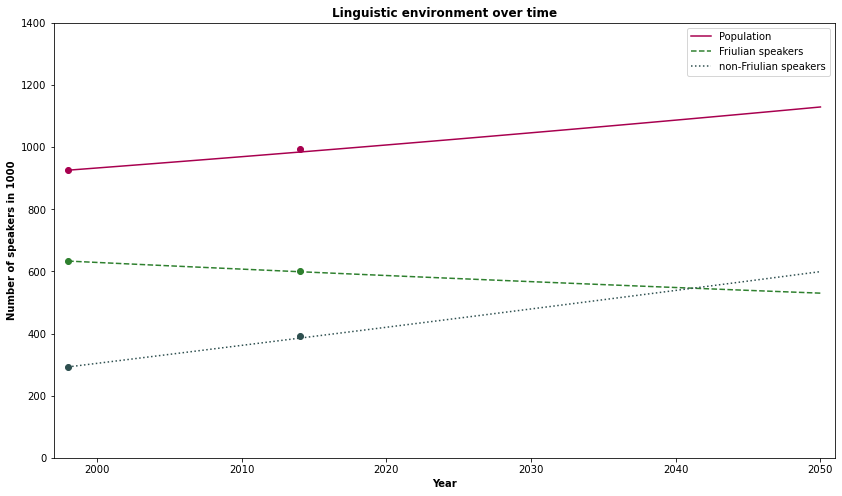

In [9]:
# Absolute numbers
plot_trajectory(traj_1998, 
                data_1998,
                "Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_1998.png")

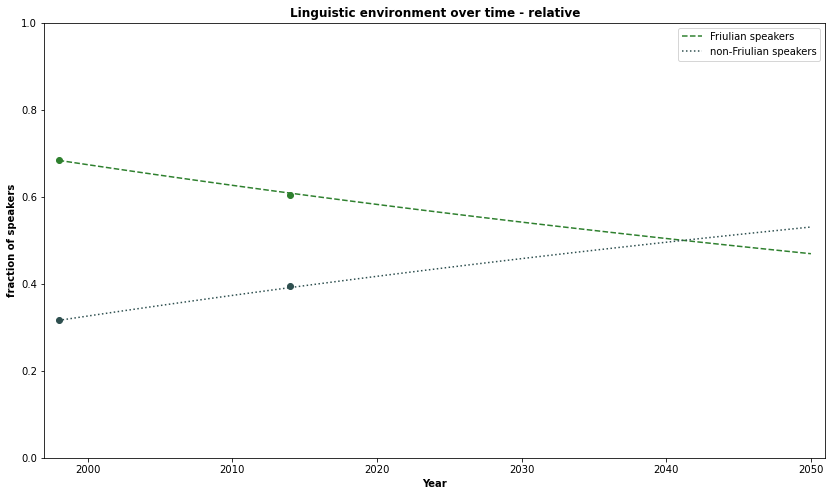

In [10]:
plot_trajectory_relative(traj_1998, data_1998,"Friulian",fname="plots/full_relative_1998.png")

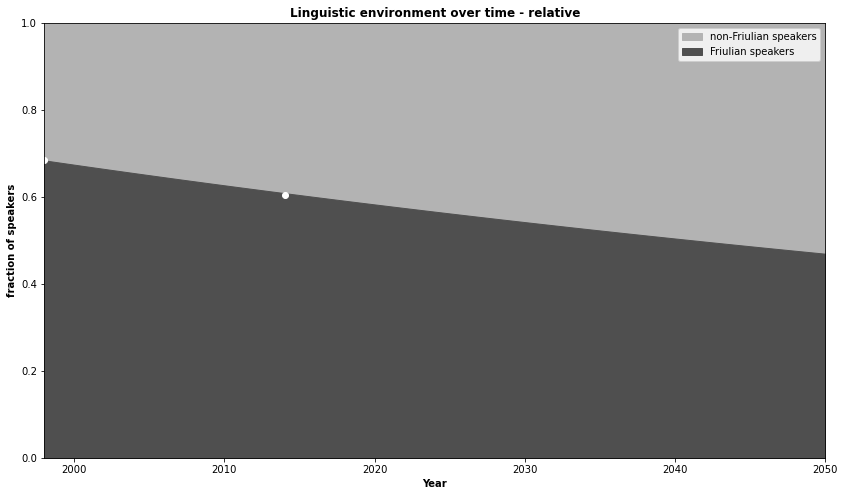

In [11]:
plot_trajectory_relative_fill(traj_1998, 
                              data_1998,
                              "Friulian",
                              fname="plots/full_relative_fill_1998.png")

### Version 2: Start at 2014

In [12]:
# set parameters
with open("data/data_2014.json", "r") as file:
    data_full_2014 = json.load(file)

data_2014 = get_emp_data(data_full_2014)

In [13]:
traj_2014 = trajectory(T, parameters, data_2014)

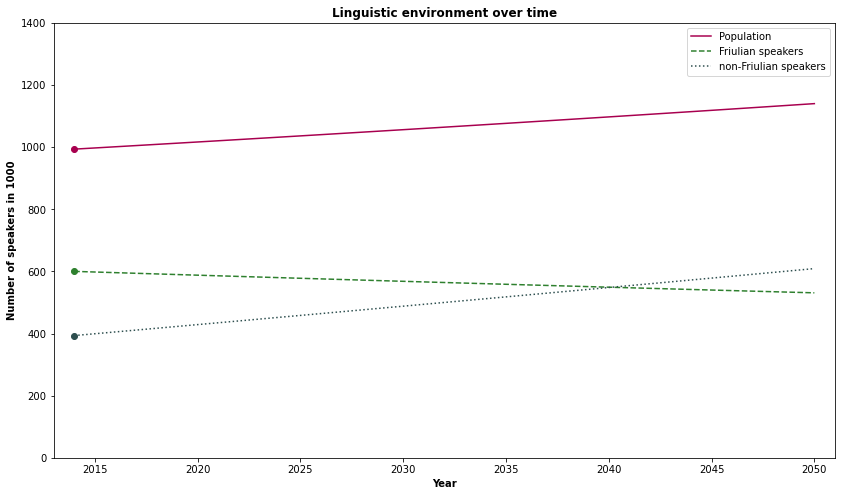

In [14]:
plot_trajectory(traj_2014, 
                data_2014, 
                "Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_2014.png")

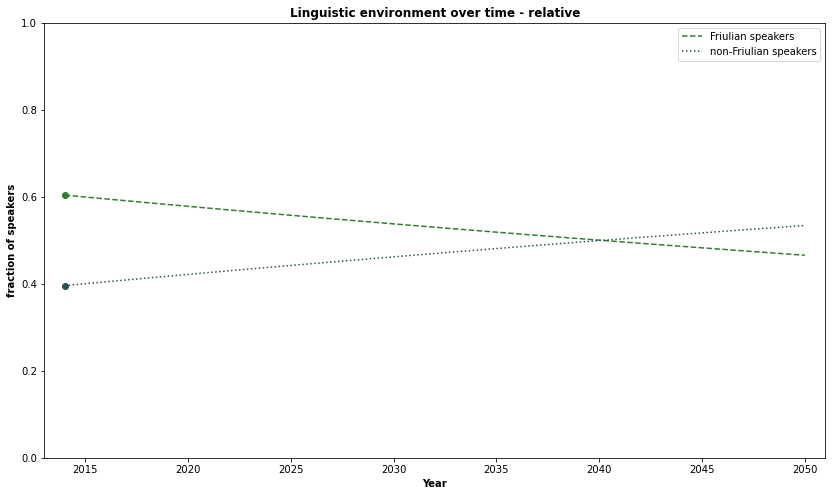

In [15]:
plot_trajectory_relative(traj_2014, 
                         data_2014,
                         "Friulian",
                         fname="plots/full_relative_2014.png")

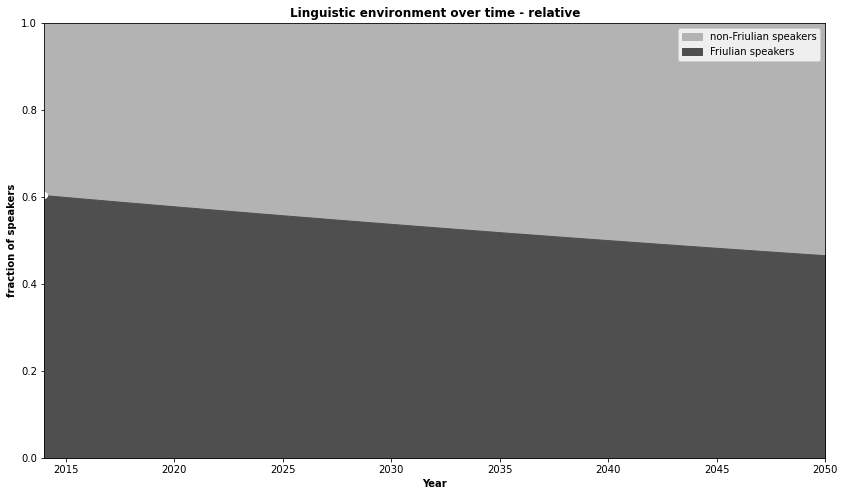

In [16]:
plot_trajectory_relative_fill(traj_2014, 
                              data_2014,
                              "Friulian",
                              fname="plots/full_relative_fill_2014.png")

## A2: Old sample

**Note**: For the "old sample", we work with the unadjusted familiy transition rates q. This is due to the fact that the 2014 transition rates are no good estimate for the 1978 rates 

In [5]:
# set parameters
# set parameters
with open("data/parameter_estimates_unadjusted.json", "r") as file:
    param_old = json.load(file)
    
with open("data/data_old.json", "r") as file:
    data = json.load(file)
    

parameters_old = get_params(param_old)
data_old = get_emp_data(data)

In [6]:
parameters_old.print_params()

lam = 0.007980000000000001
mu = 0.011105

nu = 0.0069524999999999995
m_H = 1
m_L = 0
m_B = 0

C1 = 0.5
C2 = 0

q = 
[[0.749 0.104 0.    0.    0.074]
 [0.    0.    1.    1.    0.   ]
 [0.251 0.896 0.    0.    0.926]]

sHB = 0
sBH = 0
sLB = 0
sLH = 0

a_LB = 0
a_HB = 0
a_BL = 0
a_BH = 0


In [7]:
data_old.print_data()

xH =
[0.225 0.325]
xL =
[0 0]
xB =
[0.775 0.675]
years
[1998 2014]


**relative**

In [8]:
traj_old = trajectory_rel(T, parameters_old, data_old)

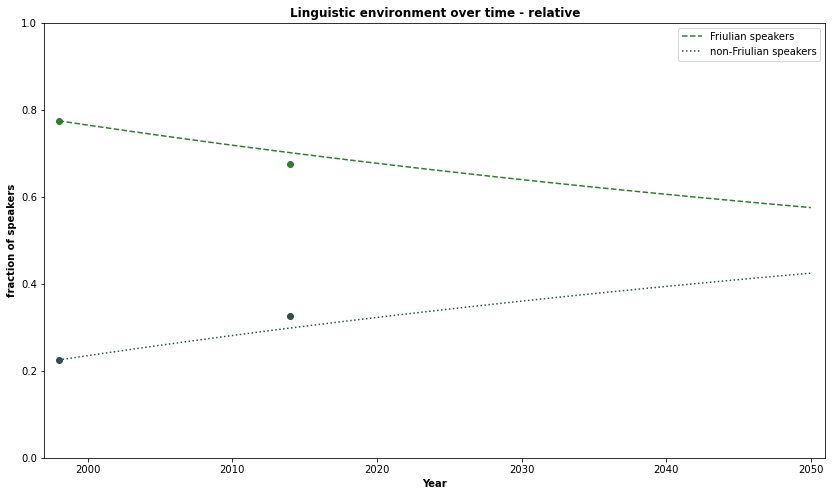

In [9]:
plot_trajectory_relative(traj_old, 
                         data_old,
                         "Friulian",
                         fname="plots/old_relative_all.png")

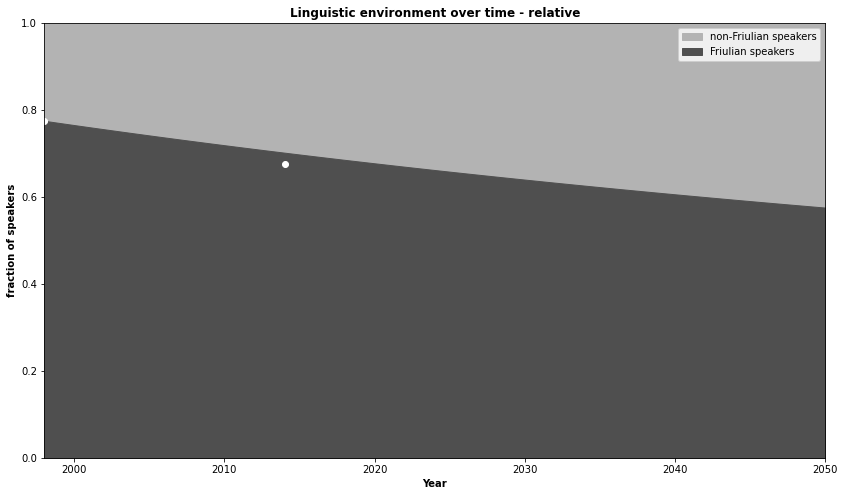

In [10]:
plot_trajectory_relative_fill(traj_old, 
                              data_old,
                              "Friulian",
                              fname="plots/old_relative_filled_all.png")

## A3: Comparison of the models at final time

In [23]:
traj_1998_end = np.array(traj_1998[1:,-1])
traj_1998_end_rel = traj_1998_end/sum(traj_1998_end)

traj_2014_end = np.array(traj_2014[1:,-1])
traj_2014_end_rel = traj_2014_end/sum(traj_2014_end)

traj_2014_start = np.array(traj_2014[1:,0])
traj_2014_start_rel = traj_2014_start/sum(traj_2014_start)


traj_old_end_rel = np.array(traj_old[1:,-1])

In [24]:
print("2014")
print(f"   N = {traj_2014_start[0]+traj_2014_start[2] :0.0f}")
print(f"   NB = {traj_2014_start[2] :0.0f}")
print(f"   NH = {traj_2014_start[0] :0.0f}")
print(f"   xB = {traj_2014_start_rel[2] :0.3f}")
print(f"   xH = {traj_2014_start_rel[0] :0.3f}")

print("")

print(f"T = {T}")

print("")
print(f" Full sample, start 1998")
print(f"   N = {traj_1998_end[0]+traj_1998_end[2] :0.0f}")
print(f"   NB = {traj_1998_end[2] :0.0f}")
print(f"   NH = {traj_1998_end[0] :0.0f}")
print(f"   xB = {traj_1998_end_rel[2] :0.3f}")
print(f"   xH = {traj_1998_end_rel[0] :0.3f}")



print("")
print(f" Full sample, start 2014")
print(f"   N = {traj_2014_end[0]+traj_2014_end[2] :0.0f}")
print(f"   xB = {traj_2014_end_rel[2] :0.3f}")
print(f"   xH = {traj_2014_end_rel[0] :0.3f}")

print("")
print(f" Old sample")
print(f"   xB = {traj_old_end_rel[2] :0.3f}")
print(f"   xH = {traj_old_end_rel[0] :0.3f}")





2014
   N = 993663
   NB = 600172
   NH = 393491
   xB = 0.604
   xH = 0.396

T = 2050

 Full sample, start 1998
   N = 1129393
   NB = 530034
   NH = 599359
   xB = 0.469
   xH = 0.531

 Full sample, start 2014
   N = 1140161
   xB = 0.466
   xH = 0.534

 Old sample
   xB = 0.558
   xH = 0.442


**adjusting projection from "old sample" with 1998, 2014 data**

In [25]:
print("")
print(f" Version old - adjusted with empirical fraction from 1998")
print(f"   xB = {traj_old_end_rel[2]*data_1998.Rel.xB[0]/data_old.Rel.xB[1]}")
print(f"   xH = {1-traj_old_end_rel[2]*data_1998.Rel.xB[0]/data_old.Rel.xB[1]}")

print("")
print(f" Version old - adjusted with empirical fraction from 2014")
print(f"   xB = {traj_old_end_rel[2]*data_2014.Rel.xB[0]/data_old.Rel.xB[1]}")
print(f"   xH = {1-traj_old_end_rel[2]*data_2014.Rel.xB[0]/data_old.Rel.xB[1]}")


 Version old - adjusted with empirical fraction from 1998
   xB = 0.4926140561316156
   xH = 0.5073859438683844

 Version old - adjusted with empirical fraction from 2014
   xB = 0.4349983770518944
   xH = 0.5650016229481056


## A4: Analysis for individual provinces

### Udine

In [26]:
# set parameters
with open("data/data_udine_2014.json", "r") as file:
    data_udine_2014 = json.load(file)

data_udine = get_emp_data(data_udine_2014)

traj_udine = trajectory(T, parameters, data_udine)

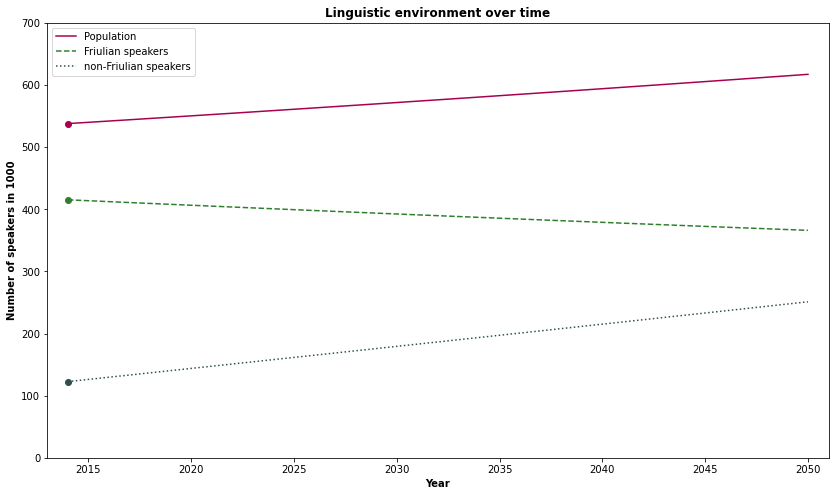

In [27]:
plot_trajectory(traj_udine, 
                data_udine,
                "Friulian",
                y_scaling = 1000, 
                y_lim = 700000,
                fname = "plots/absolute_udine.png")

### Pordenone

In [28]:
# set parameters
with open("data/data_pordenone_2014.json", "r") as file:
    data_pordenone_2014 = json.load(file)

data_pordenone = get_emp_data(data_pordenone_2014)

traj_pordenone = trajectory(T, parameters, data_pordenone)

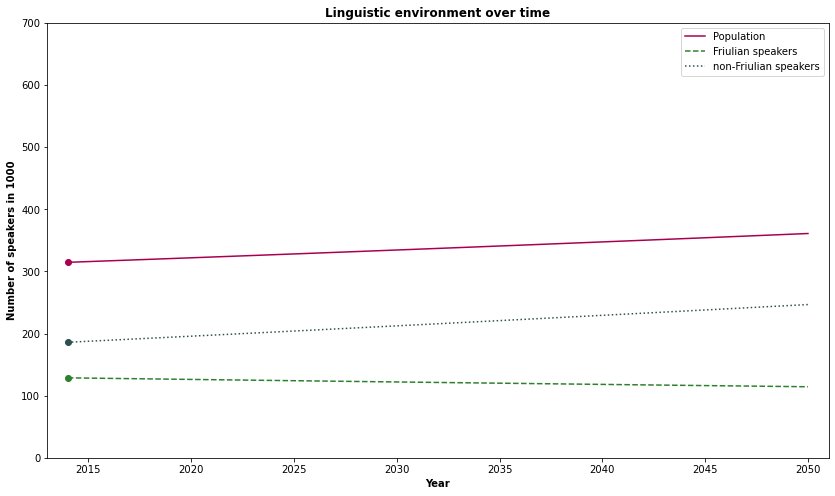

In [29]:
plot_trajectory(traj_pordenone,
                data_pordenone,
                "Friulian",
                y_scaling = 1000,
                y_lim = 700000,
                fname = "plots/absolute_pordenone.png")

### Gorizia

In [30]:
# set parameters
with open("data/data_gorizia_2014.json", "r") as file:
    data_gorizia_2014 = json.load(file)

data_gorizia = get_emp_data(data_gorizia_2014)

traj_gorizia = trajectory(T, parameters, data_gorizia)

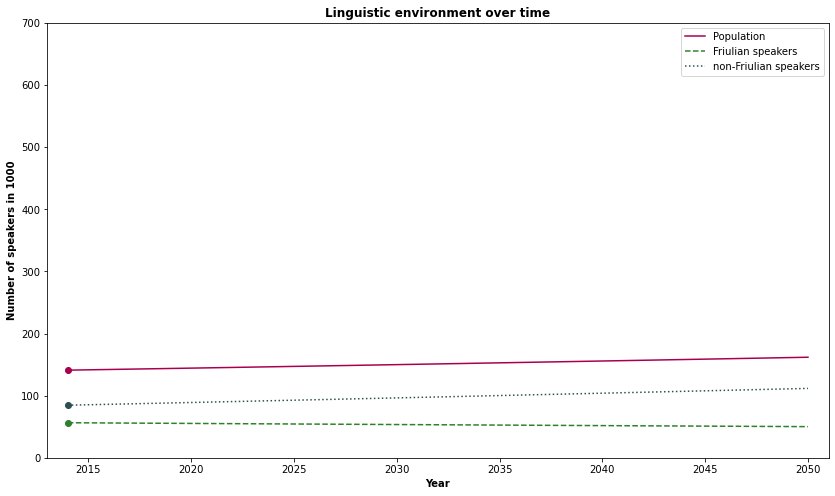

In [31]:
plot_trajectory(traj_gorizia, 
                data_gorizia,
                "Friulian",
                y_scaling = 1000,
                y_lim = 700000,
                fname = "plots/absolute_gorizia.png")

### Comparison

In [32]:
udine_start  = np.array(traj_udine[1:,0])
udine_end = np.array(traj_udine[1:,-1])

pordenone_start  = np.array(traj_pordenone[1:,0])
pordenone_end = np.array(traj_pordenone[1:,-1])

gorizia_start = np.array(traj_gorizia[1:,0])
gorizia_end = np.array(traj_gorizia[1:,-1])

total_start = udine_start + pordenone_start + gorizia_start
total_end = udine_end + pordenone_end + gorizia_end


In [33]:
print("")
print("Udine")
print("  2014")
print(f"   N = {udine_start[2]+udine_start[0] :0.0f}")
print(f"   NB = {udine_start[2] :0.0f}")
print(f"   NH = {udine_start[0] :0.0f}")
print(f"   xB = {udine_start[2]/(udine_start[0]+udine_start[2]) :0.3f}")
print(f"   xH = {udine_start[0]/(udine_start[0]+udine_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {udine_end[2]+udine_end[0] :0.0f}")
print(f"   NB = {udine_end[2] :0.0f}")
print(f"   NH = {udine_end[0] :0.0f}")
print(f"   xB = {udine_end[2]/(udine_end[0]+udine_end[2]) :0.3f}")
print(f"   xH = {udine_end[0]/(udine_end[0]+udine_end[2]) :0.3f}")


Udine
  2014
   N = 537943
   NB = 415292
   NH = 122651
   xB = 0.772
   xH = 0.228

  2050
   N = 617253
   NB = 366126
   NH = 251127
   xB = 0.593
   xH = 0.407


In [34]:
print("pordenone")
print("  2014")
print(f"   N = {pordenone_start[2]+pordenone_start[0] :0.0f}")
print(f"   NB = {pordenone_start[2] :0.0f}")
print(f"   NH = {pordenone_start[0] :0.0f}")
print(f"   xB = {pordenone_start[2]/(pordenone_start[0]+pordenone_start[2]) :0.3f}")
print(f"   xH = {pordenone_start[0]/(pordenone_start[0]+pordenone_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {pordenone_end[2]+pordenone_end[0] :0.0f}")
print(f"   NB = {pordenone_end[2] :0.0f}")
print(f"   NH = {pordenone_end[0] :0.0f}")
print(f"   xB = {pordenone_end[2]/(pordenone_end[0]+pordenone_end[2]) :0.3f}")
print(f"   xH = {pordenone_end[0]/(pordenone_end[0]+pordenone_end[2]) :0.3f}")

pordenone
  2014
   N = 314644
   NB = 128689
   NH = 185955
   xB = 0.409
   xH = 0.591

  2050
   N = 361033
   NB = 114365
   NH = 246668
   xB = 0.317
   xH = 0.683


In [35]:
print("gorizia")
print("  2014")
print(f"   N = {gorizia_start[2]+gorizia_start[0] :0.0f}")
print(f"   NB = {gorizia_start[2] :0.0f}")
print(f"   NH = {gorizia_start[0] :0.0f}")
print(f"   xB = {gorizia_start[2]/(gorizia_start[0]+gorizia_start[2]) :0.3f}")
print(f"   xH = {gorizia_start[0]/(gorizia_start[0]+gorizia_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {gorizia_end[2]+gorizia_end[0] :0.0f}")
print(f"   NB = {gorizia_end[2] :0.0f}")
print(f"   NH = {gorizia_end[0] :0.0f}")
print(f"   xB = {gorizia_end[2]/(gorizia_end[0]+gorizia_end[2]) :0.3f}")
print(f"   xH = {gorizia_end[0]/(gorizia_end[0]+gorizia_end[2]) :0.3f}")

gorizia
  2014
   N = 141076
   NB = 56430
   NH = 84646
   xB = 0.400
   xH = 0.600

  2050
   N = 161875
   NB = 50159
   NH = 111716
   xB = 0.310
   xH = 0.690


In [36]:
print("TOTAL")
print("  2014")
print(f"   N = {total_start[0]+total_start[2] :0.0f}")
print(f"   NB = {total_start[2] :0.0f}")
print(f"   NH = {total_start[0] :0.0f}")
print(f"   xB = {total_start[2]/(total_start[0]+total_start[2]) :0.3f}")
print(f"   xH = {total_start[0]/(total_start[0]+total_start[2]) :0.3f}")
print("")
print(f"  {T}")
print(f"   N = {total_end[2]+total_end[0] :0.0f}")
print(f"   NB = {total_end[2] :0.0f}")
print(f"   NH = {total_end[0] :0.0f}")
print(f"   xB = {total_end[2]/(total_end[0]+total_end[2]) :0.3f}")
print(f"   xH = {total_end[0]/(total_end[0]+total_end[2]) :0.3f}")

TOTAL
  2014
   N = 993663
   NB = 600412
   NH = 393251
   xB = 0.604
   xH = 0.396

  2050
   N = 1140161
   NB = 530650
   NH = 609511
   xB = 0.465
   xH = 0.535


# B: Only regular speakers

## B1: Full sample

In [12]:
# set parameters
# set parameters
with open("data/parameter_estimates_regular.json", "r") as file: # 2014 and 1998 parameters are identical
    params = json.load(file) 

with open("data/data_1998_regular.json", "r") as file:
    data = json.load(file)


parameters = get_params(params)
data_1998 = get_emp_data(data)

In [13]:
traj_1998 = trajectory(T, parameters, data_1998)

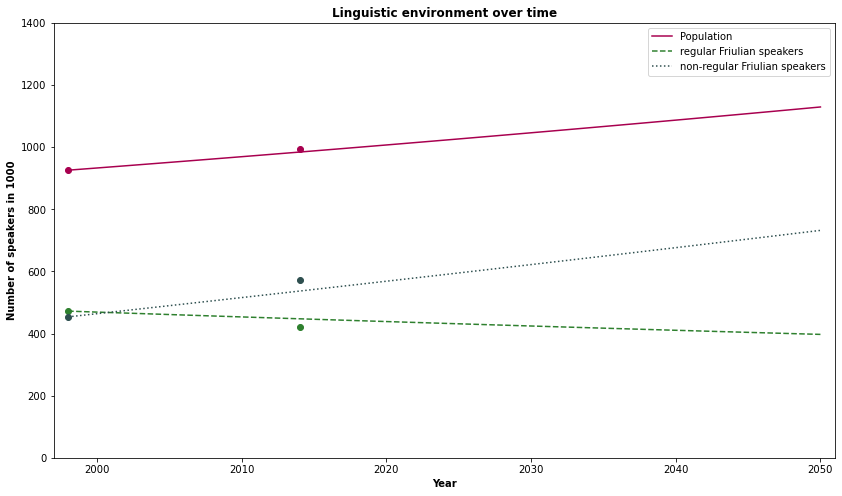

In [15]:
# Absolute numbers
plot_trajectory(traj_1998, 
                data_1998,
                "regular Friulian",
                y_scaling = 1000, 
                y_lim = 1400000,
                fname="plots/full_absolute_1998_regular.png")

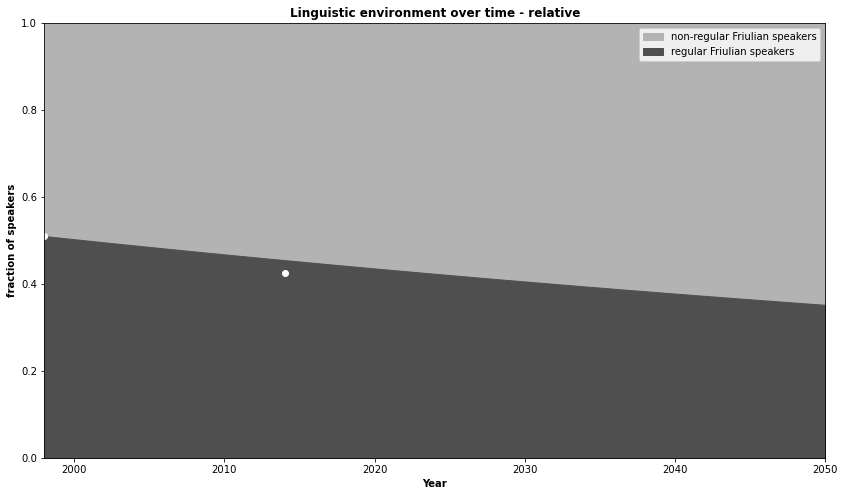

In [16]:
plot_trajectory_relative_fill(traj_1998, 
                              data_1998,
                              "regular Friulian",
                              fname="plots/full_relative_fill_1998_regular.png")

## B2: Old sample

In [17]:
# set parameters
# set parameters
with open("data/parameter_estimates_regular_unadjusted.json", "r") as file:
    param_old = json.load(file)
    
with open("data/data_old_regular.json", "r") as file:
    data = json.load(file)
    

parameters_old = get_params(param_old)
data_old = get_emp_data(data)

In [18]:
traj_old = trajectory_rel(T, parameters_old, data_old)

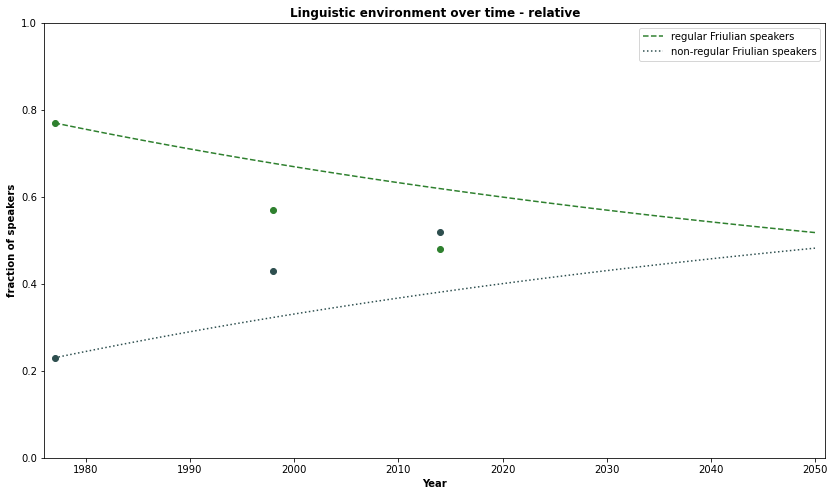

In [19]:
plot_trajectory_relative(traj_old, 
                         data_old,
                         "regular Friulian",
                         fname="plots/old_relative_all_regular.png")

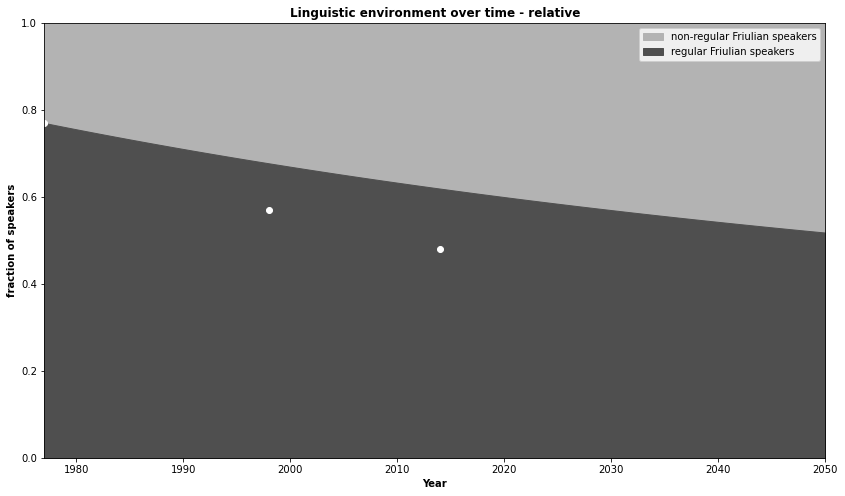

In [20]:
plot_trajectory_relative_fill(traj_old, 
                              data_old,
                              "regular Friulian",
                              fname="plots/old_relative_filled_all_regular.png")